importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive'))


['IMG_20250311_153952.jpg', 'IMG-20250311-WA0038.jpg', 'AB1_404_Cycle_1_Manuals.pdf', 'Academic Calendar - Fall Semester 23-24 Freshers (Applicable to 1 year B.Tech. & Int. M.Tech. Programmes ) (1).pdf', 'Academic Calendar - Fall Semester 23-24 Freshers (Applicable to 1 year B.Tech. & Int. M.Tech. Programmes ).pdf', 'Receipt.png', 'Classroom', 'Introduction to Engg - Poster Template.docx', 'calculator.gdoc', 'HALF ADDER.gdoc', '17123467298127303704640110572999.jpg', 'english assignment', 'photo_2024-05-01_18-36-52.jpg', '23BLC1297 (1).pdf', '23BLC1297.pdf', 'aanushka chaudhary-portfolio.docx', 'exp1:generationofsignals.gdoc', 'exp-2 23BLC1297.gdoc', 'exp-3 Stability.gdoc', 'Ms. ANUSHKA CHAUDHARY (23BLC12972) .pdf', '23BLC1297-ID.pdf', 'SECOND & THIRD YEAR MATERIALS', 'exp-5 23BLC1297.gdoc', 'exp-4 23BLC1297.gdoc', 'Module-1.pdf', 'IMG-20240705-WA0009.jpg', 'exp-6 23BLC1297.gdoc', 'The Eternal Flame of Knowledge.pdf', 'cao implementation.gdoc', 'CACHE COHERENCE.gdoc', 'exp-8_23BLC1297.g

In [ ]:
print(os.listdir('/content/drive/MyDrive/ai'))


['validation', 'train', 'test']


importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

data preprocessing

training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ai/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3125 files belonging to 36 classes.


validation image preprocessing

In [ ]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ai/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


building Model

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))


cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 613s 6s/step - accuracy: 0.0322 - loss: 41.8640 - val_accuracy: 0.0655 - val_loss: 3.4824
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.0573 - loss: 3.4807 - val_accuracy: 0.1026 - val_loss: 3.3357
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.0686 - loss: 3.3621 - val_accuracy: 0.1852 - val_loss: 3.1095
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.1046 - loss: 3.2237 - val_accuracy: 0.3390 - val_loss: 2.8057
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.1528 - loss: 3.0567 - val_accuracy: 0.4786 - val_loss: 2.4621
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.2228 - loss: 2.8047 - val_accuracy: 0.6211 - val_loss: 1.7898
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.2816 - loss: 2.5110 - val_accuracy: 0.7607 - val_loss: 1.4008
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.3850 - loss: 2.1742 - val_accuracy: 0.8177 - 

Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 90s 913ms/step - accuracy: 0.9870 - loss: 0.0466
Training accuracy: 0.9878399968147278


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9537 - loss: 0.2568
Validation accuracy: 0.9572649598121643


Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03680000081658363,
  0.05728000029921532,
  0.07327999919652939,
  0.11711999773979187,
  0.1648000031709671,
  0.23520000278949738,
  0.3014400005340576,
  0.39904001355171204,
  0.4819200038909912,
  0.5526400208473206,
  0.6243199706077576,
  0.6835200190544128,
  0.7382400035858154,
  0.7734400033950806,
  0.814079999923706,
  0.8217599987983704,
  0.8575999736785889,
  0.8716800212860107,
  0.8736000061035156,
  0.8643199801445007,
  0.8889600038528442,
  0.895039975643158,
  0.9116799831390381,
  0.8963199853897095,
  0.9142400026321411,
  0.923520028591156,
  0.9155200123786926,
  0.9315199851989746,
  0.9097599983215332,
  0.9312000274658203,
  0.9379199743270874,
  0.9465600252151489,
  0.9340800046920776,
  0.9484800100326538,
  0.9510400295257568,
  0.9459199905395508,
  0.9379199743270874,
  0.9455999732017517,
  0.937279999256134,
  0.9459199905395508,
  0.9408000111579895,
  0.9542400240898132,
  0.9417600035667419,
  0.9327999949455261,
  0.94432002305984

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.72649598121643 %


Accuracy Visualization

Training Visualization

In [ ]:
#training_history.history['accuracy']

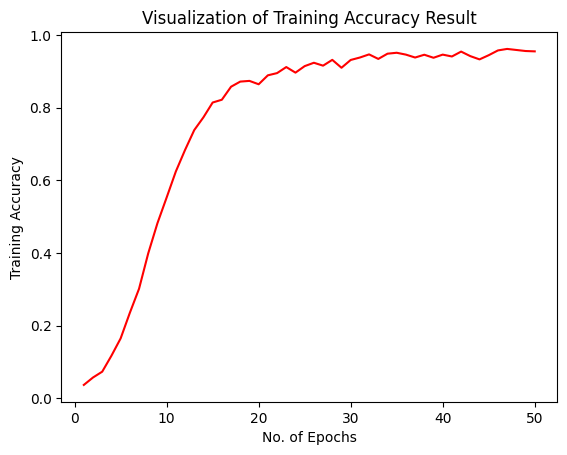

In [ ]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

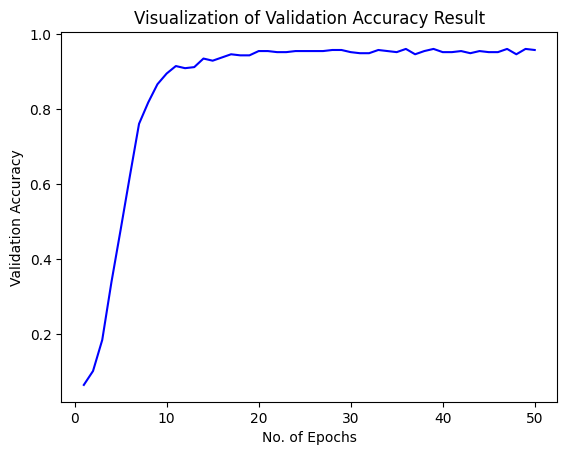

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ai/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 379 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.9457 - loss: 0.2657
Test accuracy: 0.960422158241272
